In [1]:
import sys
import json
import pandas as pd
import matplotlib.pyplot as plt

import wordle as wd

%load_ext autoreload
%autoreload 2

In [14]:
game = wd.WordleGame("crate")
wd.display_wordle_guess_outcome(game.evaluate_guess("treta"))

In [19]:
game = wd.WordleGame("crate")
outcome = game.evaluate_guess("treta")
wd.display_wordle_guess_outcome(outcome)
candidate_word = "grate"
print(f"candidate word: {candidate_word}")
wd.player.is_word_possible_given_guess_outcome(candidate_word, outcome)

candidate word: grate


(False, 'Missing Correct Letter `R`')

In [17]:
outcome

GuessOutcome(TRETA, _COCO)

In [3]:
word = "paper"

In [12]:
game = wd.WordleGame("crate")
game.record_player_guess("fusil")
game.record_player_guess("treat")

wd.display_wordle_guess_outcome(game.guesses_so_far[-1])
game.record_player_guess("crate")
print(game)
wd.display_wordle_guess_outcome(game.guesses_so_far[-1])


WordleGame(target_word='CRATE', max_guesses=6, number_of_guesses=2, is_over=False, solved=False)


WordleGame(target_word='CRATE', max_guesses=6, number_of_guesses=3, is_over=True, solved=True)


In [13]:
def make_guess(guess):
    guess_outcome = game.record_player_guess(guess)
    wd.display_wordle_guess_outcome(guess_outcome)
    if game.is_over:
        print("the game is over!")
        if game.solved:
            print(f"you won in {game.number_of_guesses} guesses")
        else:
            print(f"you have used your {game.max_guesses} guesses.")

In [12]:
game = wd.WordleGame(word)

make_guess("words")
make_guess("racer")
make_guess("later")
make_guess("apple")
make_guess("paper")

the game is over!
you won in 5 guesses


In [17]:
game = wd.WordleGame("crate")
for _ in range(6):
    game.record_player_guess("fusil")
game

WordleGame(target_word='CRATE', max_guesses=6, number_of_guesses=6, is_over=True, solved=False)

In [18]:
 game.record_player_guess("fusil")

GameOverException: this game is already over: 
WordleGame(target_word='CRATE', max_guesses=6, number_of_guesses=6, is_over=True, solved=False)

In [69]:
d = {1: 'a', 2: 'b', 3: 'c', 4: 'b', 0: 'g'}
dict(filter(lambda x: x[1] > 'b', d.items()))

{3: 'c', 0: 'g'}

In [56]:
def is_word_possible_from_single_guess_result(guess_result: list, word: str) -> bool:
    leftover_word = word
    for i, (character, char_result) in enumerate(guess_result):
        # print(character, char_result, leftover_word) # TEMP
        
        if (char_result.name == "ABSENT") & (character in leftover_word):
            return False, character, i, 1
        if (char_result.name == "CORRECT"):
            if word[i] != character:
                return False, character, i, 2
            else:
                leftover_word = leftover_word.replace(character, "", 1)
        if char_result.name == "OOP":
            if (character not in word) | (word[i] == character):
                return False, character, i, 3
            else:
                leftover_word = leftover_word.replace(character, "", 1)
    return True


game = wd.WordleGame("crate")
previous_guess = "treta"
new_candidate = "grate"
print(f"target word: {game.target_word}")
print(f"guess:     : {previous_guess}")

results = game.evaluate_guess(previous_guess)
wd.display_wordle_guess_outcome(results)
print(f"is `{new_candidate}` a possible solution?")
is_word_possible_from_single_guess_result(results, new_candidate)

# TODO: need to fix issue where a character that may be present twice gets an ABSENT like the 2nd t in TREAT for CRATE

target word: crate
guess:     : treta


is `grate` a possible solution?


(False, 't', 0, 1)

In [53]:
outcome = {i: result for i, result in enumerate(results)}
outcome

{0: ('a', <CharacterResult.OOP: 1>),
 1: ('t', <CharacterResult.ABSENT: 0>),
 2: ('e', <CharacterResult.OOP: 1>),
 3: ('t', <CharacterResult.CORRECT: 2>),
 4: ('r', <CharacterResult.OOP: 1>)}

* find all correctly positioned letters > 
* remove them from guess word and target word
* go through left over letters
    * if absent > tag as absent
    * if oop > remove from leftover letters

    

In [3]:
# load dataset
WORDS_DIC_PATH = "../data/raw/words_dictionary.json"
FIVE_LETTER_WORDS_PATH = "../data/transformed/words.txt"
!wget -q -O {WORDS_DIC_PATH} "https://github.com/dwyl/english-words/blob/master/words_dictionary.json?raw=true" 

In [7]:
WORDS_DIC_PATH = "../data/raw/words_dictionary.json"


with open(WORDS_DIC_PATH, 'r') as f:
    words_dic = json.load(f)

five_letter_words = [word for word in words_dic if len(word) == 5]

# EDA

In [11]:
# number of 5 letter words
five_letter_words = pd.Series(five_letter_words)
len(five_letter_words)

15918

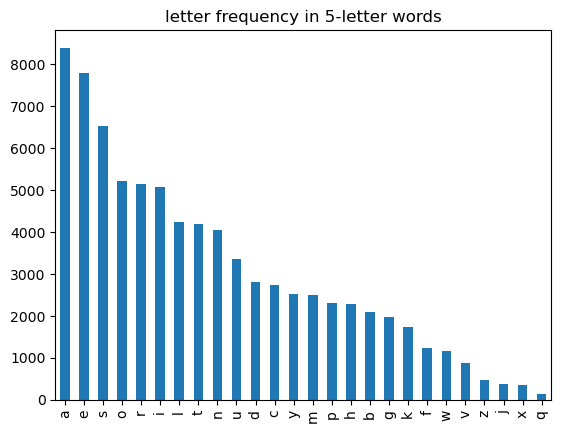

In [21]:
# letter prevalence as a whole
(five_letter_words
    .apply(lambda x: list(x))
    .explode()
    .value_counts()
    .plot(
        kind="bar",
        title="letter frequency in 5-letter words",
        ));

<AxesSubplot:title={'center':'How often does a letter appear in a 5 letter word?'}>

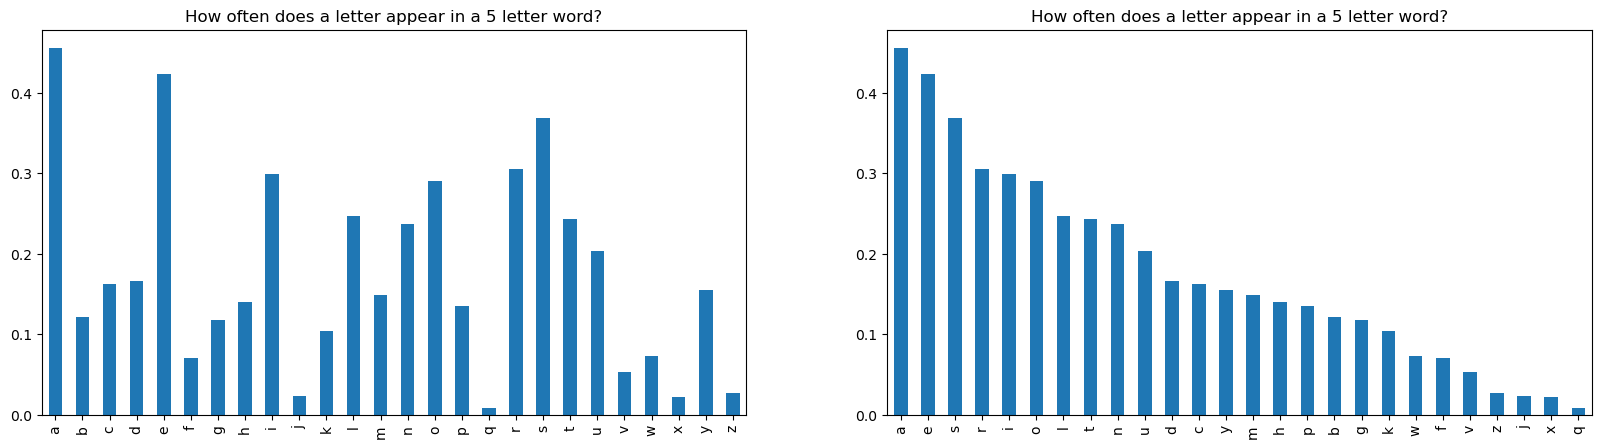

In [30]:
ALPHABET = "abcdefghijklmnopqrstuvwxyz"
# how often does a letter appear in a 5 letter word?
letter_frequency = pd.Series({letter: five_letter_words.str.contains(letter).mean() for letter in ALPHABET})

fig, ax = plt.subplots(1,2, figsize=(20,5))
letter_frequency.plot.bar(title="How often does a letter appear in a 5 letter word?", ax=ax[0])
letter_frequency.sort_values(ascending=False).plot.bar(title="How often does a letter appear in a 5 letter word?", ax=ax[1])

In [44]:
def filter_flw_by(candidates, includes: str = None, excludes: str = None, found: dict[int, str] = None):
    words = candidates.copy()
    if not found:
        found = {}
    if not includes:
        includes = ""
    if not excludes:
        excludes =""
    
    for pos, letter in found.items():
        print(pos, letter)
        words = words.loc[words.str[pos] == letter]
    
    for letter in includes:
        words =  words[check_series_that_include(words, letter, found)]
    
    for letter in excludes:
        words =  words[~check_series_that_include(words, letter, found)]

    return words

def exclude_founds(word: str, found: dict[int, str] = None):
    if not found:
        return word
    return "".join([char for i, char in enumerate(word) if i not in found])

def check_series_that_include(words, letter, found):
    return words.apply(lambda x: exclude_founds(x, found)).str.contains(letter)


exclude_founds("words", found={0: "w", 3: "d"})

filter_flw_by(five_letter_words, found={0: 'a'}, excludes='rose')


0 a


1       aalii
4       abaca
5       abaci
6       aback
7       abada
        ...  
1132    awiwi
1133    awkly
1141    axial
1145    axing
1151    axman
Length: 249, dtype: object

[('t', <CharacterResult.OOP: 1>),
 ('r', <CharacterResult.CORRECT: 2>),
 ('e', <CharacterResult.OOP: 1>),
 ('a', <CharacterResult.OOP: 1>),
 ('t', <CharacterResult.ABSENT: 0>)]